<div align="center">
    <h1> Optimization - Gradients </h1>
</div>

In [15]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [16]:
#Choose the function which you want to plot

def func(x):
    return x[0]**2 + x[1]**2
    #return -(np.cos(x[0])**2 + np.cos(x[1])**2)**2

    #return np.cos(x[1]) * np.sin(x[0])**2 + 1 / (x[0]**2 + x[1]**2 + 1) - np.cos(x[0])

def func_grad(x):
    return np.array([2*x[0], 2*x[1]])
    #x_grad = 4 * np.cos(x) * np.sin(x) * (np.cos(x)**2 + np.sin(x)**2)
    #y_grad = 4 * np.cos(x) * np.sin(x) * (np.cos(x)**2 + np.sin(x)**2)
    #return np.array([x_grad, y_grad])

    #x_grad = -np.sin(x[0]) * np.sin(x[1]) + 2*x[0] / (x[0]**2 + x[1]**2 + 1)**2 + np.sin(x[0])
    #y_grad = np.cos(x[0]) * np.cos(x[1]) + 2*x[1] / (x[0]**2 + x[1]**2 + 1)**2 - np.cos(x[1])
    #return np.array([x_grad, y_grad])

* The method of Gradient Descent

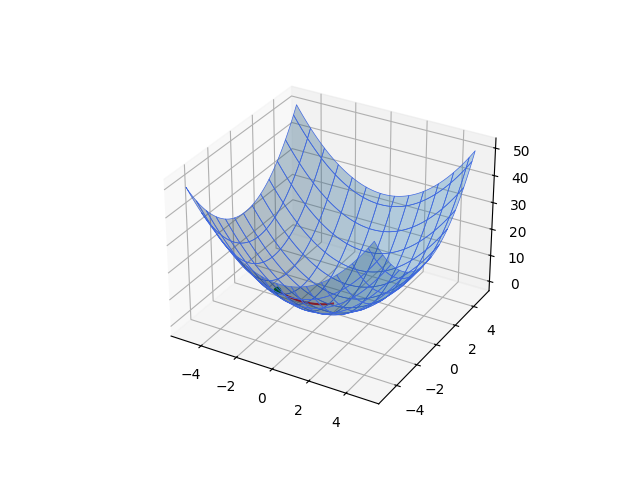

In [19]:
def descent(x, func_gradient, alpha, epsilon, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while True:

        x_new = x - alpha * func_gradient(x)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x])
    
    return x_new, np.array(trajectory)

# Starting variables
x_start = np.array([-2, -2])
alpha = 0.1
epsilon = 0.0001

x_min, trajectory = descent(x_start, func_grad, alpha, epsilon, breakpoint='steps')
trajectory = trajectory.reshape(-1, 2)

arx = plt.figure().add_subplot(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
arx.plot_surface(X, Y, func([X, Y]), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
arx.scatter(x_start[0], x_start[1], func(x_start), color='green')
arx.plot(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), color='red')

plt.show()

* The method of Steepest Descent

In [22]:
def steepest_descent(x, func_gradient, epsilon, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while True:

        alpha = np.argmin(func(x - alpha * func_gradient(x)))
        
        print(alpha)

        x_new = x - alpha * func_gradient(x)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x])
    
    return x_new, np.array(trajectory)

x_start = np.array([-2, -2])
alpha = 0.1
epsilon = 0.0001

x_min, trajectory = steepest_descent(x_start, func_grad, epsilon, breakpoint='steps')
trajectory = trajectory.reshape(-1, 2)

arx = plt.figure().add_subplot(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
arx.plot_surface(X, Y, func([X, Y]), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
arx.scatter(x_start[0], x_start[1], func(x_start), color='green')
arx.plot(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), color='red')

plt.show()

UnboundLocalError: cannot access local variable 'alpha' where it is not associated with a value